# License Plate Recognition

@misc{
license-plate-recognition-rxg4e_dataset,
title = { License Plate Recognition Dataset },
type = { Open Source Dataset },
author = { Roboflow Universe Projects },
howpublished = { \url{ https://universe.roboflow.com/roboflow-universe-projects/license-plate-recognition-rxg4e } },
url = { https://universe.roboflow.com/roboflow-universe-projects/license-plate-recognition-rxg4e },
journal = { Roboflow Universe },
publisher = { Roboflow },
year = { 2024 },
month = { oct },
note = { visited on 2025-02-17 },
}

## Imports

In [1]:
from tqdm.notebook import tqdm

from dotenv import load_dotenv
load_dotenv()

import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
tf.config.list_physical_devices('GPU'), tf.__version__

([PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')], '2.15.1')

In [2]:
# auto reload dotenv 
%load_ext dotenv
%dotenv

# auto reload libs
%load_ext autoreload
%autoreload 2

In [5]:
from utils.visualization_funcs import plot_random_images_bbox
from utils.prepare_dataset import PrepareDataset

## Paths Setup

In [7]:
from hydra import initialize, compose

# https://gist.github.com/bdsaglam/586704a98336a0cf0a65a6e7c247d248

with initialize(version_base=None, config_path="conf"):
    cfg = compose(config_name="config")
    print(cfg.DATASET_DIRS.TRAIN_DIR)

datasets/brain-tumor-2/train/


In [8]:
cfg.DATASET_DIRS

{'TRAIN_DIR': '${DATASET.DATASET_DIR}/${DATASET.DATASET_NAME}/train/', 'VALIDATION_DIR': '${DATASET.DATASET_DIR}/${DATASET.DATASET_NAME}/valid', 'TEST_DIR': '${DATASET.DATASET_DIR}/${DATASET.DATASET_NAME}/test'}

In [23]:
from pathlib import Path

DATASET_DIRS = Path(cfg.DATASET.DATASET_DIR)
DATASET_DIRS.mkdir(parents=True, exist_ok=True)

TRAIN_DIR = Path(cfg.DATASET_DIRS.TRAIN_DIR)
VALIDATION_DIR = Path(cfg.DATASET_DIRS.VALIDATION_DIR)
TEST_DIR = Path(cfg.DATASET_DIRS.TEST_DIR)

TRAIN_IMAGE_DIR = TRAIN_DIR 
TRAIN_LABELS_DIR = TRAIN_DIR / 'labels'

VALID_IMAGE_DIR = VALIDATION_DIR / 'images'
VALID_LABELS_DIR = VALIDATION_DIR / 'labels'

TEST_IMAGE = TEST_DIR / 'images'
TEST_LABELS = TEST_DIR / 'labels'

IMG_SIZE = cfg.TRAIN.IMG_SIZE
BATCH_SIZE = cfg.TRAIN.BATCH_SIZE

CLASS_NAME = [
    'label0',
    'label1',
    'label2'
]
class_map = {k: v for k, v in enumerate(CLASS_NAME)}
class_map[0]

'label0'

## Dataset Download from Roboflow

In [29]:
if len(list(DATASET_DIRS.iterdir())) == 0:
    from roboflow import Roboflow
    rf = Roboflow()
    project = rf.workspace("roboflow-universe-projects").project("license-plate-recognition-rxg4e")
    version = project.version(8)
    dataset = version.download(model_format="tensorflow")
                    

## Load images from directory

In [22]:
from utils.prepare_dataset import AnnotationProcessor

f = Path('datasets/brain-tumor-2/train/_annotations.csv')
prepare_train_dataset = AnnotationProcessor(annotation_file= f)

train_images, train_class_ids, train_bboxes  = prepare_train_dataset.process_annotations(image_dir=TRAIN_DIR)

len(train_images), len(train_class_ids), len(train_bboxes)


(218, 218, 218)

In [23]:
#
# prepare_train_dataset = PrepareDataset(image_dir=TRAIN_IMAGE_DIR, 
#                                     label_dir=TRAIN_LABELS_DIR,
#                                     dst_img_size=(IMG_SIZE, IMG_SIZE))

# train_images, train_class_ids, train_bboxes  = prepare_train_dataset.get_dataset()

In [24]:
len(train_images), len(train_class_ids), len(train_bboxes)

(218, 218, 218)

Random samples: [3, 91, 17, 173, 30, 102, 138, 44, 190]


KeyError: np.str_('label1')

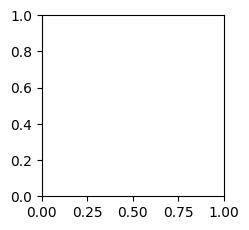

In [25]:
plot_random_images_bbox(image_paths=train_images, 
                        class_ids=train_class_ids, 
                        bboxes=train_bboxes,
                        class_map=class_map)

## Analyzing Imbalance 

In [26]:
(classes, count) = np.unique(train_class_ids, return_counts=True)
classes, count

(array(['label0', 'label1', 'label2'], dtype='<U6'), array([60, 99, 59]))

In [27]:
np.unique(train_class_ids, return_counts=True)[0]

array(['label0', 'label1', 'label2'], dtype='<U6')

In [ ]:
class_labels = np.array([0, 1, 2])
class_counts = np.array([4338, 6836, 4122])

total_samples = sum(class_counts)
class_proportions = class_counts / total_samples

print("Class Proportions:", class_proportions)

Class Proportions: [0.28360356 0.44691423 0.26948222]


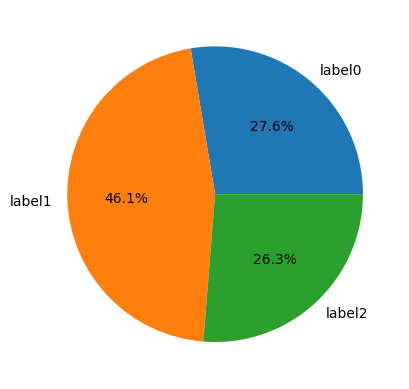

In [ ]:
plt.pie(x=count, labels=class_map.values(),autopct='%1.1f%%')
plt.show()

## Rebalance dataset by Down sempling to dataset with min images

In [ ]:
del train_images, (train_class_ids, train_bboxes)

In [ ]:

rebal_train_images, rebal_train_class_ids, rebal_train_bboxes = prepare_train_dataset.rebalance_by_down_sampling_datasets()
len(rebal_train_images), len(rebal_train_class_ids), len(rebal_train_bboxes)

[INFO] Unique class ids: [0 1 2], value counts: [ 60 100  57]
[INFO] Down sampling size: 57


(171, 171, 171)

Random samples: [47, 58, 159, 145, 96, 169, 33, 152, 38]


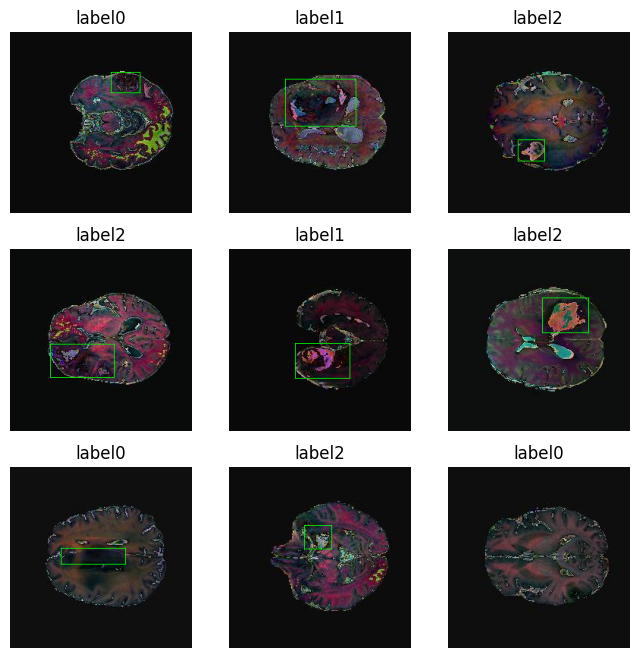

In [ ]:
plot_random_images_bbox(image_paths=rebal_train_images,
                        class_ids=rebal_train_class_ids,
                        bboxes=rebal_train_bboxes,
                        class_map=class_map)

### Augmentation

In [ ]:
aug_rebal_train_images, aug_rebal_train_class_ids, aug_rebal_train_bboxes = prepare_train_dataset.rebalance_by_down_sampling_datasets(augment=True, plot=True)
len(aug_rebal_train_images), len(aug_rebal_train_class_ids), len(aug_rebal_train_bboxes)

[INFO] Unique class ids: [0 1 2], value counts: [ 60 100  57]
[INFO] Down sampling size: 57


(342, 342, 342)

Random samples: [118, 93, 149, 53, 196, 317, 313, 218, 253]


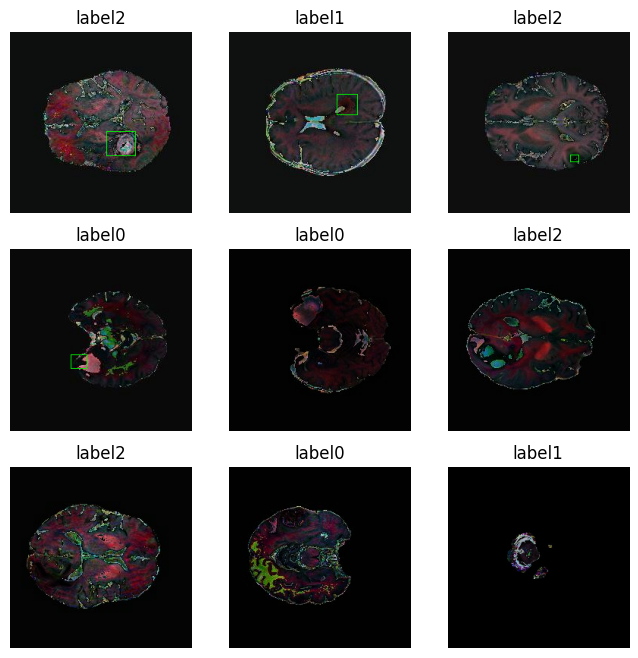

In [ ]:
plot_random_images_bbox(image_paths=aug_rebal_train_images,
                        class_ids=aug_rebal_train_class_ids,
                        bboxes=aug_rebal_train_bboxes,
                        class_map=class_map)